In [611]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
import numpy as np

HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (double click to edit):

- Name 1: Dale Legband
- Name 2: Alex Matsunami
- Name 3: Cory Nichols


# In Class Assignment One
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class. Once class has started you may rework your answers as a team for the initial part of the assignment. 

<a id="top"></a>
## Contents
* <a href="#Loading">Loading the Data</a>
* <a href="#linearnumpy">Linear Regression</a>
* <a href="#sklearn">Using Scikit Learn for Regression</a>
* <a href="#classification">Linear Classification</a>

________________________________________________________________________________________________________

<a id="Loading"></a>
<a href="#top">Back to Top</a>
## Loading the Data
Please run the following code to read in the "diabetes" dataset from sklearn's data loading module. 

This will load the data into the variable `ds`. `ds` is a dictionary object with fields like `ds.data`, which is a matrix of the continuous features in the dataset. The object is not a pandas dataframe. It is a numpy matrix. Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is a continuous value we are trying to predict. Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [612]:
from sklearn.datasets import load_diabetes
import numpy as np
from __future__ import print_function

ds = load_diabetes()

# this holds the continuous feature data
# because ds.data is a matrix, there are some special properties we can access (like 'shape')
print('features shape:', ds.data.shape, 'format is:', ('rows','columns')) # there are 442 instances and 10 features per instance
print('range of target:', np.min(ds.target),np.max(ds.target))

features shape: (442, 10) format is: ('rows', 'columns')
range of target: 25.0 346.0


In [613]:
from pprint import pprint

# we can set the fields inside of ds and set them to new variables in python
pprint(ds.data) # prints out elements of the matrix
pprint(ds.target) # prints the vector (all 442 items)

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])
array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
        310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
         97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
         85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
        265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,
         53.,  190.,  142.,   75.,  

________________________________________________________________________________________________________
<a id="linearnumpy"></a>
<a href="#top">Back to Top</a>
## Using Linear Regression 
In the videos, we derived the formula for calculating the optimal values of the regression weights (you must be connected to the internet for this equation to show up properly):

$$ w = (X^TX)^{-1}X^Ty $$

where $X$ is the matrix of values with a bias column of ones appended onto it. For the diabetes dataset one could construct this $X$ matrix by stacking a column of ones onto the `ds.data` matrix. 

$$ X=\begin{bmatrix}
         & \vdots &        &  1 \\
        \dotsb & \text{ds.data} & \dotsb &  \vdots\\
         & \vdots &         &  1\\
     \end{bmatrix}
$$

**Question 1:** For the diabetes dataset, how many elements will the vector $w$ contain?

In [614]:
# Enter your answer here (or write code to calculate it)

X = np.hstack((np.ones((ds.data.shape[0], 1)), ds.data))
print(X.shape[1])

#

11


________________________________________________________________________________________________________

**Exercise 1:** In the following empty cell, use this equation and numpy matrix operations to find the values of the vector $w$. You will need to be sure $X$ and $y$ are created like the instructor talked about in the video. Don't forget to include any modifications to $X$ to account for the bias term in $w$. You might be interested in the following functions:

- `np.hstack((mat1,mat2))` stack two matrices horizontally, to create a new matrix
- `np.ones((rows,cols))` create a matrix full of ones
- `my_mat.T` takes transpose of numpy matrix named `my_mat`
- `np.dot(mat1,mat2)` is matrix multiplication for two matrices
- `np.linalg.inv(mat)` gets the inverse of the variable `mat`

In [615]:
# Write you code here, print the values of the regression weights using the 'print()' function in python

y = ds.target # set target array as column vector
w = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))

print('The intercept is:', w[0])
print('The weight coefficients are:', w[1:])

The intercept is: 152.133484163
The weight coefficients are: [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]



___
<a id="sklearn"></a>
<a href="#top">Back to Top</a>
# Start of Live Session Coding

**Exercise 2:** Scikit-learn also has a linear regression fitting implementation. Look at the scikit learn API and learn to use the linear regression method. The API is here: 

- API Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Use the sklearn `LinearRegression` module to check your results from the previous question. 

**Question 2**: Did you get the same parameters? 

In [616]:
from sklearn.linear_model import LinearRegression

# write your code here, print the values of model by accessing 
#    its properties that you looked up from the API

X2 = X[:,1:]

lr = LinearRegression()
lrfit = lr.fit(X2,y)

print('model coefficients are:', lr.coef_)
print('model intercept is', lr.intercept_)
print('Answer to question is', 'We did get the same parameters as in normal equation')


model coefficients are: [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
model intercept is 152.133484163
Answer to question is We did get the same parameters as in normal equation


________________________________________________________________________________________________________

Recall that to predict the output from our model, $\hat{y}$, from $w$ and $X$ we need to use the following formula:

- $\hat{y}=w^TX^T$

Where $X$ is a matrix with example instances in *each row* of the matrix. 

**Exercise 3:** 
- *Part A:* Use matrix multiplication to predict output using numpy, $\hat{y}_{numpy}$ and also using the sklearn regression object, $\hat{y}_{sklearn}$.
 - **Note**: you may need to make the regression weights a column vector using the following code: `w = w.reshape((len(w),1))` This assumes your weights vector is assigned to the variable named `w`.
- *Part B:* Calculate the mean squared error between your prediction from numpy and the target, $\sum_i(y-\hat{y}_{numpy})^2$. 
- *Part C:* Calculate the mean squared error between your sklearn prediction and the target, $\sum_i(y-\hat{y}_{sklearn})^2$.

In [617]:
from sklearn.metrics import mean_squared_error as mse
# Use this block to answer the questions

#w = w.reshape((len(w),1))
yhats = np.dot(w.T,X.T)
error = np.dot(X,w)-y

print('MSE Sklearn is:', mse(y, lr.predict(X2)))
print('MSE Numpy is:', (np.square(y-yhats).sum())/X.shape[0])
print('Linear Algebra MSE is:', np.dot(error.T,error)/X.shape[0])


MSE Sklearn is: 2859.69039877
MSE Numpy is: 2859.69039877
Linear Algebra MSE is: 2859.69039877


In [608]:
# Extra work - Linear Regression with Gradient Descent
# X in this case does not have 1's or 0's appended
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=50000):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1]) # set up vector of 0's as random input to begin with
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X) # get the predicted value from net_input below
            errors = (y - output) # capture the errors in a vector
            self.w_[1:] += self.eta * X.T.dot(errors) # multiply learning rate eta by X transpose times the error
            # then adjust coefficient weights self.w with result
            self.w_[0] += self.eta * errors.sum() # adjust intercept based on total error of model
            cost = (errors**2).sum() / 2.0 # square the error, sum and divide by 2
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # multiply coefficients by values, add on intercept
    
    def predict(self,X):
        return self.net_input(X)

In [609]:
#X = X[:,1:]
lr = LinearRegressionGD()
lr.fit(X,y)
print(lr.w_,'\n',w)

[ 152.13348416   -7.71527805 -237.25665917  525.67381431  322.16823319
 -294.88251498   81.63990344 -120.77818483  114.57574962  565.71763874
   69.4352998 ] 
 [ 152.13348416  -10.01219782 -239.81908937  519.83978679  324.39042769
 -792.18416163  476.74583782  101.04457032  177.06417623  751.27932109
   67.62538639]


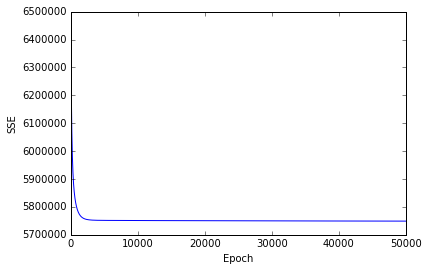

In [607]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(range(1,lr.n_iter+1),lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

________________________________________________________________________________________________________
<a id="classification"></a>
<a href="#top">Back to Top</a>
## Using Linear Classification
Now lets use the code you created to make a classifier with linear boundaries. Run the following code in order to load the iris dataset.

In [501]:
from sklearn.datasets import load_iris
import numpy as np

# this will overwrite the diabetes dataset
ds = load_iris()
print('features shape:', ds.data.shape) # there are 150 instances and 4 features per instance
print('original number of classes:', len(np.unique(ds.target)))
# now let's make this a binary classification task
ds.target = ds.target > 1
print ('new number of classes:', len(np.unique(ds.target)))

features shape: (150, 4)
original number of classes: 3
new number of classes: 2


________________________________________________________________________________________________________

**Exercise 4:** Now use linear regression to come up with a set of weights, `w`, that predict the class value. This is exactly like you did before for the *diabetes* dataset. However, instead of regressing to continuous values, you are just regressing to the integer value of the class (0 or 1), like we talked about in the video. Remember to account for the bias term when constructing the feature matrix, `X`. Print the weights of the linear classifier.

In [502]:
# write your code here and print the values of the weights 

lr2 = LinearRegression()
lr2fit = lr2.fit(ds.data, ds.target)
print('the intercept is', lr2.intercept_)
print('the weights of the linear classifier are', lr2.coef_)

# using numpy
manFit = np.hstack((np.ones((ds.data.shape[0],1)),ds.data))
invterm = np.linalg.inv(np.dot(manFit.T,manFit)) # first term, take inverse of dot product of X transpose X
w = np.dot(invterm, np.dot(manFit.T, ds.target)) # now take dot product of first term and dot product of X transpose y column vector
print('The intercept is:', w[0])
print('The weight coefficients are:', w[1:])

the intercept is -0.6854464644
the weights of the linear classifier are [-0.04409841  0.19823256  0.00424001  0.54654271]
The intercept is: -0.6854464644
The weight coefficients are: [-0.04409841  0.19823256  0.00424001  0.54654271]


________________________________________________________________________________________________________

**Exercise 5:** Finally, use a hard decision function on the output of the linear regression to make this a binary classifier. This is just like we talked about in the video, where the output of the linear regression passes through a function: 

- $\hat{y}=g(w^TX^T)$ where
 - $g(w^TX^T)$ for $w^TX^T < \alpha$ maps the predicted class to `0` 
 - $g(w^TX^T)$ for $w^TX^T \geq \alpha$ maps the predicted class to `1`. 

Here, alpha is a threshold for deciding the class. 

**Question 3**: What value for $\alpha$ makes the most sense? What is the accuracy of the classifier given the $\alpha$ you chose? 

Note: You can calculate the accuracy with the following code: `accuracy = float(sum(yhat==y)) / len(y)` assuming you choose variable names `y` and `yhat` for the target and prediction, respectively.

In [503]:
w = w.reshape((1,5))
w

array([[-0.68544646, -0.04409841,  0.19823256,  0.00424001,  0.54654271]])

In [505]:
# use this box to predict the classification output

alphacompare = zip(ds.target, lr2.predict(ds.data))
alphacompare.sort()

predictedVals = lr2.predict(ds.data)
numpyPredict = np.dot(w, manFit.T)

# we are going to settle on alpha 0.5 to create our classification function as it provides a good separation point
# in our list of tuples 

def HardDecision(predicted, alpha):
    results = []
    for val in predicted:
        if val >= alpha:
            results.append(1)
        else: results.append(0)
    return results


# please let us know if there is a better way to do this one

classes = HardDecision(predictedVals, 0.5)

print('Percentage accuracy:', float(sum(classes==ds.target)) / len(ds.target))

decision = np.where(lr2.predict(ds.data) > 0.5, 1, 0)

print('Percentage accuracy:', float(sum(decision==ds.target)) / len(ds.target))

Percentage accuracy: 0.926666666667
Percentage accuracy: 0.926666666667


________________________________________________________________________________________________________

That's all! Please **save (make sure you saved!!!) and upload your rendered notebook** and please include **team member names** in the notebook submission.